This Jupyter notebook walks through some of the most common charting scripts. Should be able to copy and paste easily
- Create a generic data frame, with some random numbers and values
- Basic chart types: Line, dot, pie
- Minimum polishing 
- Pivots and Multi-line charts
- Histograms
- Subplots
- Multiple y-scales

This is a very useful diagram from https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
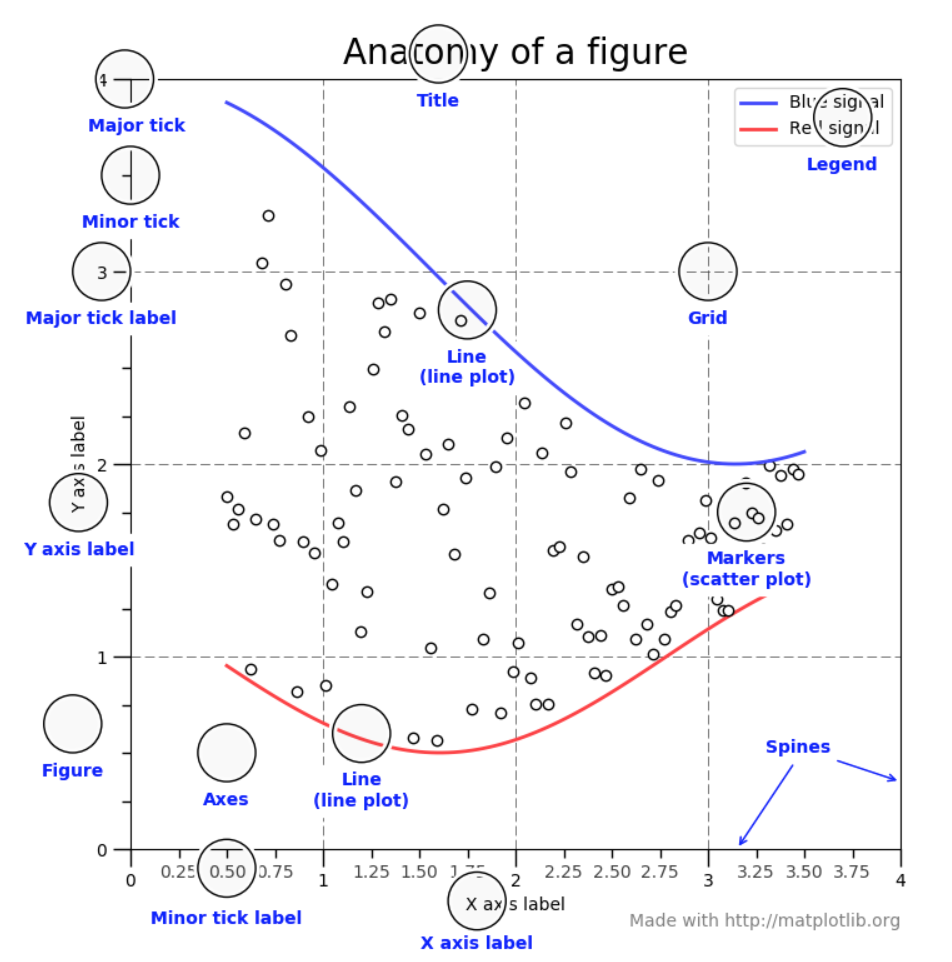

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Prep and some basic charts

In [2]:
#Create a data frame
rowIndex = np.arange(1,26) # e.g. 1, 2, 3, ... 25
colA = np.random.randint(101, size=25) # e.g. [ x, y, z... ], 25 random numbers between 0 and 100
colB = np.random.randint(101, size=25) 
df = pd.DataFrame(data={"ID":rowIndex, "Column A":colA, "Column B": colB})

<AxesSubplot:>

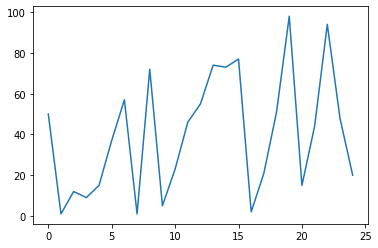

In [3]:
df["Column A"].plot()

<AxesSubplot:ylabel='Column A'>

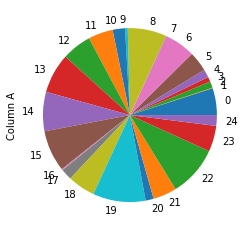

In [4]:
df["Column A"].plot(kind='pie')

In [5]:
df.head()

,ID,Column A,Column B
0,1,50,100
1,2,1,13
2,3,12,56
3,4,9,93
4,5,15,82


# 2. Minimum polishing

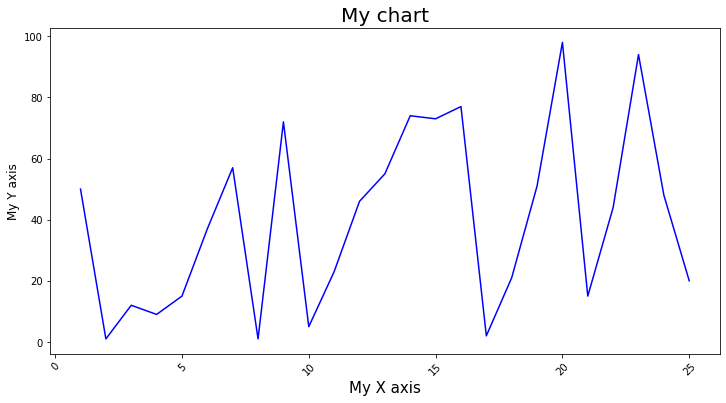

In [6]:
# Basic figure, with size and subtitles
fig = plt.figure(figsize=(12,6))

# Provide the X and Y values, a marker, a color, and the label:
plt.plot(df["ID"], df["Column A"], color='b', label="Column A")

# Labels
plt.title("My chart", fontsize=20)
plt.xlabel("My X axis", fontsize=15)
plt.ylabel("My Y axis", fontsize=12)

#xticks rotation
plt.xticks(rotation=45)

plt.show()

# 3. Pivots and Multi-line charts

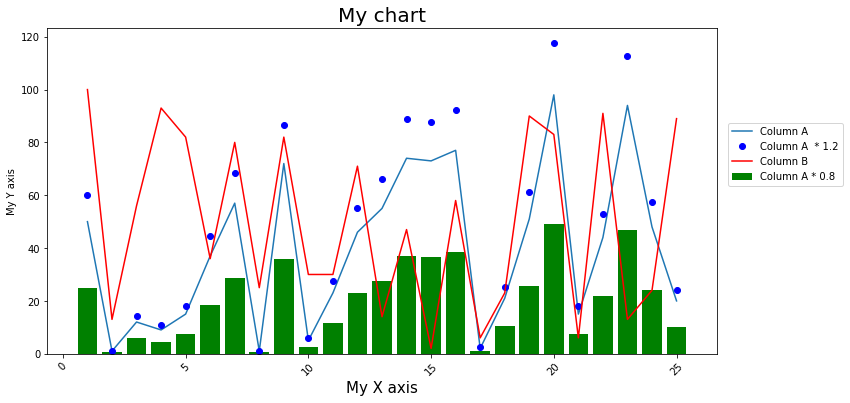

In [7]:
# Pivots and Multi-line charts
fig = plt.figure(figsize=(12,6))

plt.plot(df["ID"],df["Column A"], label="Column A") #x, y, no marker = default to line
plt.plot(df["ID"],df["Column A"] * 1.2, 'o', color='b', label="Column A  * 1.2") # x, y, marker
plt.bar(df["ID"],df["Column A"] * 0.5, color='g', label="Column A * 0.8") # x, y, marker
plt.plot(df["ID"],df["Column B"], color='r', label="Column B") # x, y, smaller dot

# Labels
plt.title("My chart", fontsize=20)
plt.xlabel("My X axis", fontsize=15)
plt.ylabel("My Y axis", fontsize=10)
plt.xticks(rotation=45)
#Legends
# Key here is that the lines above, needs to have the labels. That's what the legend uses to figure out what to put there.
# See what location means here https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
# The bbox_to_anchor puts the legend within (0-1) or outside (1+) of the plot area (x,y)
plt.legend(loc=3, bbox_to_anchor=(1.01, 0.5))

plt.show()


# 4. Tick labels range and grid

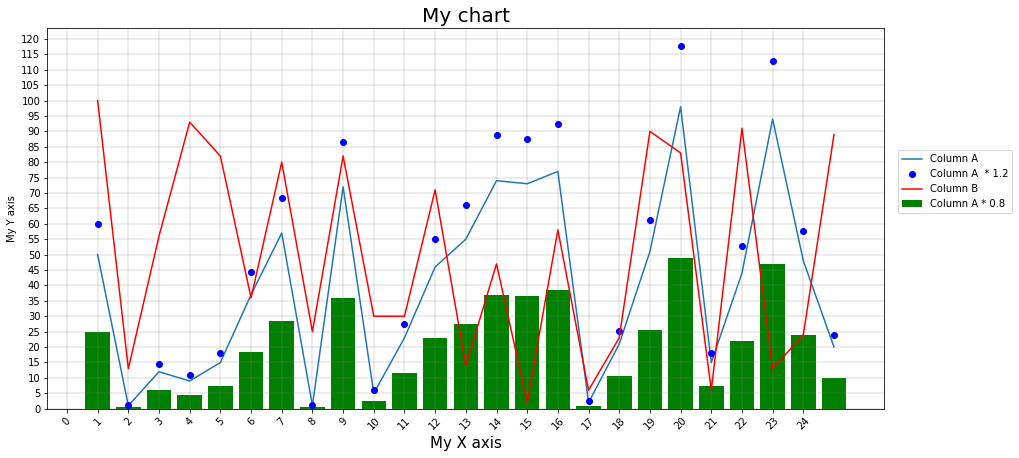

In [8]:
# Pivots and Multi-line charts
fig = plt.figure(figsize=(15,7))

plt.plot(df["ID"],df["Column A"], label="Column A") #x, y, no marker = default to line
plt.plot(df["ID"],df["Column A"] * 1.2, 'o', color='b', label="Column A  * 1.2") # x, y, marker
plt.bar(df["ID"],df["Column A"] * 0.5, color='g', label="Column A * 0.8") # x, y, marker
plt.plot(df["ID"],df["Column B"], color='r', label="Column B") # x, y, smaller dot

# Labels
plt.title("My chart", fontsize=20)
plt.xlabel("My X axis", fontsize=15)
plt.ylabel("My Y axis", fontsize=10)
plt.xticks(np.arange(0,25,1), rotation=45) #arange takes Start, Stop, and Step. So this makes the values go from 0 to 25, 1 mark each
plt.yticks(np.arange(0,125,5))

# Grids
plt.grid(color='gray', linestyle='-', linewidth=0.3)

#Legends
# Key here is that the lines above, needs to have the labels. That's what the legend uses to figure out what to put there.
# See what location means here https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
# The bbox_to_anchor puts the legend within (0-1) or outside (1+) of the plot area (x,y)
plt.legend(loc=3, bbox_to_anchor=(1.01, 0.5))



plt.show()



# 5. Histograms

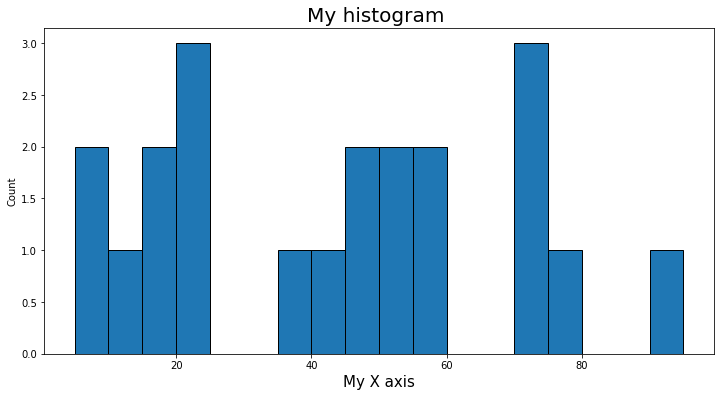

In [9]:
# Multiline with very different scales
fig = plt.figure(figsize=(12,6))

df["Column A"].plot(kind="hist", bins=np.arange(5, 100, 5), edgecolor = 'k') #bins of 5, 10, 15, ...

# Labels
plt.title("My histogram ", fontsize=20)
plt.xlabel("My X axis", fontsize=15)
plt.ylabel("Count", fontsize=10)

plt.show()

# 6. Subplots

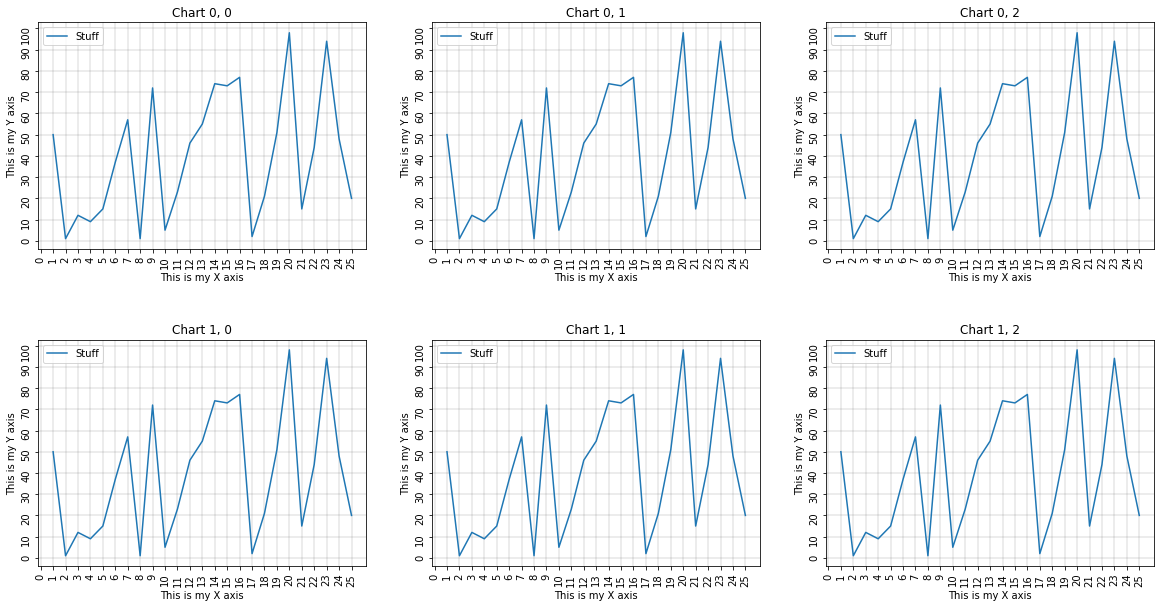

In [10]:
#Sometimes you want to plot a bunch of subplots
rowCount = 2
colCount = 3
fig, axs = plt.subplots(rowCount, colCount, figsize=(20,10))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
for i in range(0,rowCount):
    for j in range(0,colCount):
        axs[i, j].plot(df["ID"],df["Column A"], label = "Stuff")
        axs[i, j].tick_params(labelrotation=90)
        axs[i, j].set_title("Chart " + str(i) + ", " + str(j))
        axs[i, j].set_xlabel("This is my X axis", fontsize=10)
        axs[i, j].set_ylabel("This is my Y axis", fontsize=10)
        axs[i, j].set_xticks(np.arange(0,26,1))
        axs[i, j].set_yticks(np.arange(0,101,10))
        axs[i, j].legend()
        axs[i, j].grid(color='gray', linestyle='-', linewidth=0.3)
        
plt.show()

# 7. Multiple y scales

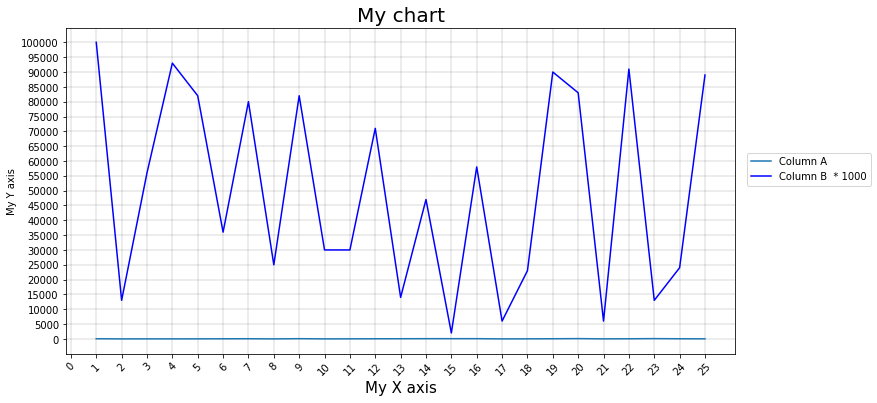

In [11]:
# Multiline with very different scales
fig = plt.figure(figsize=(12,6))

plt.plot(df["ID"],df["Column A"], label="Column A") #x, y, no marker = default to line
plt.plot(df["ID"],df["Column B"] * 1000, color='b', label="Column B  * 1000") # x, y, marker

# Labels
plt.title("My chart", fontsize=20)
plt.xlabel("My X axis", fontsize=15)
plt.ylabel("My Y axis", fontsize=10)

#Labels and grids
plt.xticks(np.arange(0,26,1), rotation=45)
plt.yticks(np.arange(0,100001,5000))
plt.grid(color='gray', linestyle='-', linewidth=0.3)

#Legends
plt.legend(loc=3, bbox_to_anchor=(1.01, 0.5))

#If you don't have this print it'll show some weird log
print()

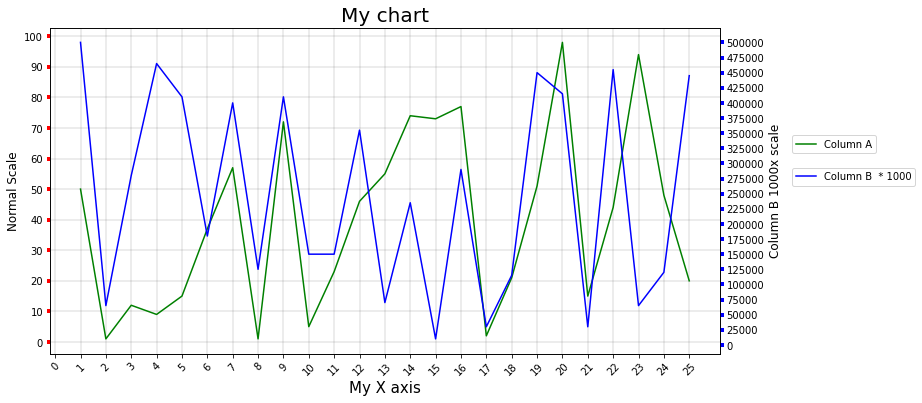

In [12]:
# Different y scales
fig, ax1 = plt.subplots(figsize=(12,6))

plt.title("My chart", fontsize=20)

#Plot series one
ax1.set_xlabel('My X axis', fontsize=15)
ax1.set_ylabel('Normal Scale', fontsize=12)
ax1.plot(df["ID"],df["Column A"], color='g', label="Column A") #x, y, no marker = default to line
ax1.tick_params(axis='y', color="r", width=4) # Can use this to modify the look of the tick marks too
ax1.tick_params(axis='x', rotation=45)

#Get the second axes and plot
ax2 = ax1.twinx()  
ax2.set_ylabel('Column B 1000x scale', fontsize=12)  
ax2.plot(df["ID"],df["Column B"] * 5000, color='b', label="Column B  * 1000") # x, y, marker
ax2.tick_params(axis='y', color="b", width=4)

ax1.set_xticks(np.arange(0,26,1))
ax1.set_yticks(np.arange(0,101,10))
ax2.set_yticks(np.arange(0,500001,25000))
ax1.grid(color='gray', linestyle='-', linewidth=0.3)

#Legends
ax1.legend(loc=3, bbox_to_anchor=(1.1, 0.6))
ax2.legend(loc=3, bbox_to_anchor=(1.1, 0.5))

plt.show()
print()

In [13]:
?plt.plot

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,